# Calculations for Basic Video Processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import matplotlib.animation as animation
from IPython.display import HTML
from numpy.linalg import norm

## Read x and y values of obtained centroids per frame

In [3]:
data = pd.read_csv('centroids.csv')
x = data['centroid x'].values
y = data['centroid y'].values

## Plotting xy displacemt

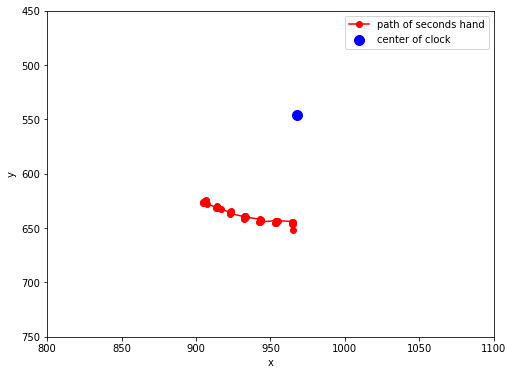

In [4]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'ro-',label="path of seconds hand")
plt.scatter(968,546,c='blue',s=100, label='center of clock')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(800,1100)
plt.ylim(750,450)
plt.legend(loc='best')
plt.show()

## Calculate angle between blobs after each frame

#### Center of clock

In [4]:
center_x = 968
center_y = 546

#### Distance from center of clock to blob centroids

In [5]:
rx = np.abs(x-center_x)
ry = np.abs(y-center_y)

## Calculate and plot angular displacement of seconds hand

In [6]:
thetas = []

for i in range(len(rx)-1):
    if i>len(rx):
        continue
    else:
        point_a = np.array([rx[i],ry[i]])
        point_b = np.array([rx[i+1],ry[i+1]])
        dot_product = np.dot(point_a,point_b)
        magnitude_a = norm(point_a)
        magnitude_b = norm(point_b)  

        theta = np.arccos(dot_product/(magnitude_a*magnitude_b))
        thetas.append(theta)

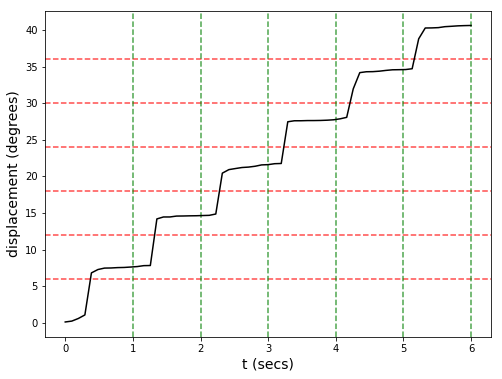

In [12]:
plt.figure(figsize=(8,6))
for j in np.arange(6,37,6):
    plt.axhline(j,color='red',linestyle='--',alpha=0.7)
for d in np.arange(1,7,1):
    plt.axvline(d,color='green',linestyle='--',alpha=0.7)
plt.plot(np.linspace(0,6,63),np.cumsum(thetas)*180/np.pi,color='black')
plt.xlabel('t (secs)',fontsize=14)
plt.ylabel('displacement (degrees)',fontsize=14)
# plt.savefig('displacement.png',dpi=300,bbox_inches='tight')
plt.show()

## Calculating angular speed of seconds hand

In [9]:
m,b = np.polyfit(np.linspace(0,6,63),np.cumsum(thetas)*180/np.pi,deg=1)

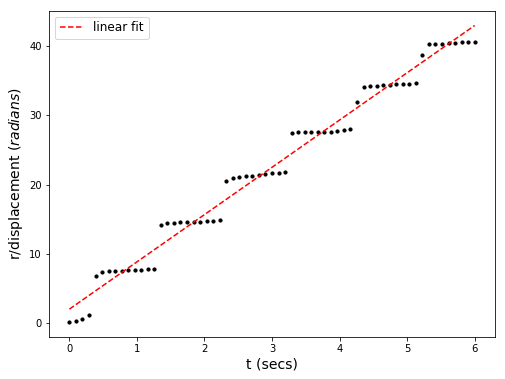

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(np.linspace(0,6,63),np.cumsum(thetas)*180/np.pi,c='black',s=10)
plt.plot(np.linspace(0,6,63),m*np.linspace(0,6,63)+b,'r--',label='linear fit')
plt.xlabel('t (secs)',fontsize=14)
plt.ylabel('r/displacement ($radians$)',fontsize=14)
plt.legend(fontsize=12)

# plt.savefig('speed.png',dpi=300,bbox_inches='tight')
plt.show()